## Simulazione II Esame di Metodi Numerici Soluzioni##

Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. 
- Risolvere i 3 sistemi lineari aventi matrice dei coefficienti A1 e termine noto b1, matrice dei coefficienti A2 e termine noto b2, matrice dei coefficienti A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.

                                                                                            punti 12
                                                                                            
- Verificare se le matrici sono malcondizionate. Indicare la formula matematica dell'indice di condizionamento e spiegare perchè è importante conoscere l'indice di condizionamento di una matrice.
                                                                                           
                                                                                           punti 2

- Dopo aver copiato nel numpy array b1p il termine noto b1 del primo sistema lineare con matrice dei coefficienti A1, effettuarne una perturbazione della prima componente nel seguente modo b1p[0]=b1p[0]+0.001*b1p[0]. Risolvere il sistema lineare con matrice A1 e termine noto perturbato b1p. Calcolare l'errore relativo sulla soluzione e l'errore relativo sul termine noto, descrivere ciò che si verifica giustificandolo alla luce della teoria.

                                                                                           punti 2


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_II.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

In [3]:
from scipy.io import loadmat
import numpy as np

dati = loadmat('Test_I.mat')

A1=dati["A1"] 

A1=A1.astype(float)

b1=dati["b1"] 

b1=b1.astype(float)

A2=dati["A2"] 

A2=A2.astype(float)

b2=dati["b2"] 

b2=b2.astype(float)

A3=dati["A3"] 

A3=A3.astype(float)

b3=dati["b3"] 

b3=b3.astype(float)


In [4]:
def getInfo(A):
    print(A.shape)
    cond(A)
    sparsa(A)
    simmetrica(A)
    max_rank(A)
    diagStrettamenteDominante(A)
    return

def sparsa(A):
    nonZero = np.count_nonzero(A)
    perc = nonZero/(A.shape[0]*A.shape[1]) * 100
    if perc <= 33:
        print("matrice sparsa")
    else:
        print("matrice densa")
    print(perc,"%")

def defPos(A):
    val,vect = np.linalg.eig(A)
    flag = val > 0
    if np.all(flag):
        print("def pos")
    
def simmetrica(A):
    if A.shape[0] == A.shape[1] and np.all(A.T == A):
        print("Simmetrica")
        defPos(A)
        
def cond(A):
    print("condizionamento => {:e}".format(np.linalg.cond(A)))

def max_rank(A):
    if min(A.shape) == np.linalg.matrix_rank(A):
        print("rango massimo")
        
def diagStrettamenteDominante(A):
    if np.all(np.diag(A)>np.abs(A-np.diag(A))):
        print("diagonale strettamente dominante")

In [5]:
getInfo(A1)
print("=>fattorizzazione di Gauss<=")
print("--------------------------------")
getInfo(A2)
print("=>QRLS o SVDLS<=")
print("--------------------------------")
getInfo(A3)
print("=>Metodo di Discesa del Gradiente<=")
print("--------------------------------")

(10, 10)
condizionamento => 1.206149e+02
matrice densa
100.0 %
Simmetrica
rango massimo
=>fattorizzazione di Gauss<=
--------------------------------
(25, 10)
condizionamento => 1.000000e+04
matrice densa
100.0 %
rango massimo
=>QRLS o SVDLS<=
--------------------------------
(225, 225)
condizionamento => 1.030869e+02
matrice sparsa
2.1037037037037036 %
Simmetrica
def pos
rango massimo
=>Metodo di Discesa del Gradiente<=
--------------------------------


In [6]:
import scipy.linalg as splin
import SolveTriangular as solver
def fattorizzazioneGauss(A,b):
    P,L,U = splin.lu(A)
    Pb = P.T@b
    y,flag = solver.Lsolve(L,Pb)
    x,flag = solver.Usolve(U,y)
    return x

x1 = fattorizzazioneGauss(A1,b1)
print(x1)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [7]:
def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=splin.qr(A)
    h=Q.T@b
    x,flag=solver.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo
x2,res = qrLS(A2,b2)
print(x2)
print(res)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
2.0122058281059509e-28


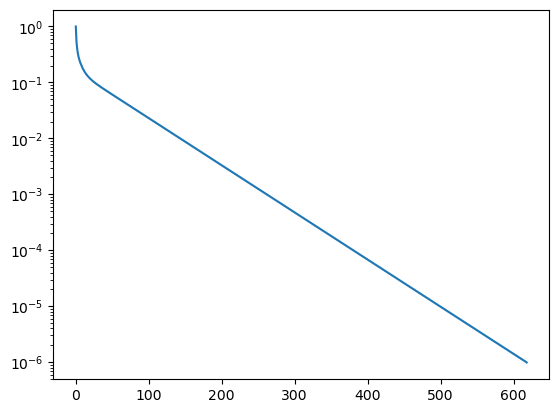

In [8]:
import matplotlib.pyplot as plt
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore>=tol:
        it=it+1
        Ap= A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x =  x +p*alpha
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it

tol = 1e-6
itMax = 4000
x0 = np.zeros(b3.shape)

x3,vet_r,vec_sol,it =steepestdescent(A3,b3,x0,itMax,tol) 
plt.semilogy(range(it+1),vet_r)
plt.show()

la formula è $$K(A) = ||A||_2||A^{-1}||_2$$ ed è importante dato che il condizionamento di una matrice ci dice quanto la soluzione è soggetta a variazioni in presenza di perturbazione sui dati, con matrici ben condizionate (K(A)<=10^2) l'errore si propaga meno restituendo soluzioni accettabili anche con un pò di perturbazione mentre se la matrice è mal condizionata (K(A)>=10^4) l'errore viene propagato fino al punto da avere delle soluzioni molto lontane dalle soluzioni che ci si aspetta

In [10]:
def calcErrRel(trueValue,obtainedValue):
    return np.linalg.norm(obtainedValue-trueValue,np.inf)/np.linalg.norm(trueValue,np.inf)

b1p = b1.copy()
b1p[0]=b1p[0]+0.001*b1p[0]
x_per = fattorizzazioneGauss(A1,b1p)
print(x_per)
print("err rel sul vettore delle incognite => {:e}".format(calcErrRel(x1,x_per)))
print("err rel sul vettore soluzione => {:e}".format(calcErrRel(b1,b1p)))

[[1.00661667]
 [1.0201726 ]
 [1.00685288]
 [0.97967728]
 [1.01248261]
 [1.00237884]
 [0.9957675 ]
 [0.99352225]
 [0.98844541]
 [0.99710401]]
err rel sul vettore delle incognite => 2.032272e-02
err rel sul vettore soluzione => 8.132041e-04


## Esercizio 2 ##

Per ogni $k \in N$ l'equazione di II grado $x^2+(2^{2k}-3^{-2k})x-2^{2k}3^{-2k}=0 $ ha come soluzioni esatte $x_1=-2^{2k}$,$x_2=3^{-2k}$,

Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 6 e 16;  [**Punti 2**]

In [14]:
delta= lambda a,b,c:np.sqrt(b**2-4*a*c)
x1 = lambda a,b,c: (-b+delta(a,b,c))/(2*a)
x2 = lambda a,b,c: (-b-delta(a,b,c))/(2*a)

k = np.arange(6,17)
print(k)

a = 1
b = 2**(2*k)-1/3**(2*k)
c = -2**(2*k)/3**(2*k)

realX2 = -2**(2*k)
realX1 = 1/3**(2*k)

print(x1(a,b,c))
print(realX1)
print("----------")
print(x2(a,b,c))
print(realX2)

[ 6  7  8  9 10 11 12 13 14 15 16]
[ 1.88167633e-06  2.09074642e-07  2.32284947e-08  2.57568900e-09
 -1.28056854e-09  4.65661287e-10 -9.31322575e-10 -3.72529030e-09
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[ 1.88167642e-06  2.09075158e-07  2.32305731e-08  2.58117479e-09
 -1.23734368e-09  7.59711850e-10 -9.63108092e-10 -1.32483513e-09
  5.56595627e-10 -9.89960808e-10 -1.99467661e-09]
----------
[-4.09600000e+03 -1.63840000e+04 -6.55360000e+04 -2.62144000e+05
 -1.04857600e+06 -4.19430400e+06 -1.67772160e+07 -6.71088640e+07
 -2.68435456e+08 -1.07374182e+09 -1.99467661e-09]
[      -4096      -16384      -65536     -262144    -1048576    -4194304
   -16777216   -67108864  -268435456 -1073741824           0]


- per entrambe le soluzioni, si calcoli l'errore relativo commesso al variare di k che assume valori interi tra 6 e 16;   [**Punti 1**]

In [16]:
def calcErrRel(real,obtained):
    return np.linalg.norm(obtained-real,np.inf)/np.linalg.norm(real,np.inf)
print("errore relativo su x1 => {:e}".format(calcErrRel(realX1,x1(a,b,c))))
print("errore relativo su x2 => {:e}".format(calcErrRel(realX2,x2(a,b,c))))

errore relativo su x1 => 1.275700e-03
errore relativo su x2 => 1.857687e-18


- si rappresentino in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]

C:\Users\utente\AppData\Local\Temp\ipykernel_19296\1078377460.py:4: RuntimeWarning: divide by zero encountered in divide
  return (obtained-real)/real


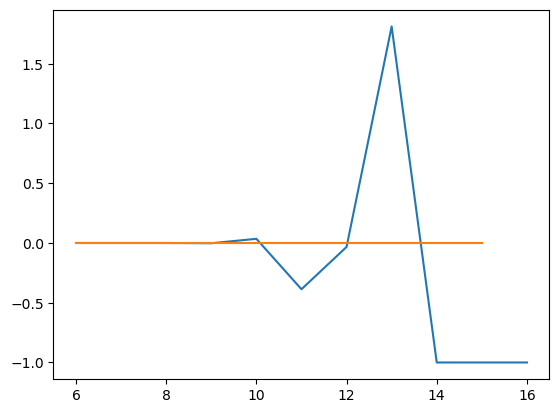

In [18]:
import matplotlib.pyplot as plt

def calcArrayErrRel(real,obtained):
    return (obtained-real)/real


plt.plot(k,calcArrayErrRel(realX1,x1(a,b,c)))
plt.plot(k,calcArrayErrRel(realX2,x2(a,b,c)))
 

- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria. [**Punti 6**]

Noto che per x2 non ci sono problemi tranne per l'ultimo elemento che dovrebbe venire 0 ed invece viene un valore per 10^-9, mentre per x1 abbiamo un errore notevole dato dallo spacing

In [21]:
print("4*a*c => ",4*a*c)
print("spacing di b**2 => ",np.spacing(b**2))

4*a*c =>  [-3.08293865e-02 -1.37019496e-02 -6.08975536e-03 -2.70655794e-03
  5.18979556e-03 -1.27458498e-02  6.46330899e-02  3.55632722e-01
 -5.97640004e-01  4.25184930e+00 -0.00000000e+00]
spacing di b**2 =>  [1.86264515e-09 2.98023224e-08 4.76837158e-07 7.62939453e-06
 2.44140625e-04 1.95312500e-03 6.25000000e-02 1.00000000e+00
 1.60000000e+01 2.56000000e+02 7.70371978e-34]


Infatti notiamo come x1 viene azzerato dal 13esimo valore in poi, perchè per via dello spacing l'operazione $$b^2-4ac$$ è come se venisse annulata quindi nel calcolo del delta abbiamo solo $$b^2$$ che poi viene messo sotto radice e poi viene eseguita l'operazione $$\frac{-b+b}{2a}$$ che da 0 

- in caso di instabilita', si fornisca un algoritmo di calcolo stabile e si mostrino in un nuovo grafico gli
andamenti dei nuovi errori relativi ottenuti. [**Punti 6**]

noto che $$c = x_1x_2$$ quindi posso dire che $$x_1=\frac{c}{x_2}$$

In [25]:
newX1 = c/x2(a,b,c)
print(newX1)

print("errore relativo su x1 => {:e}".format(calcErrRel(realX1,newX1)))
print("errore relativo su x2 => {:e}".format(calcErrRel(realX2,x2(a,b,c))))

[ 1.88167642e-06  2.09075158e-07  2.32305731e-08  2.58117479e-09
 -1.23734368e-09  7.59711850e-10 -9.63108092e-10 -1.32483513e-09
  5.56595627e-10 -9.89960808e-10  0.00000000e+00]
errore relativo su x1 => 1.060053e-03
errore relativo su x2 => 1.857687e-18


C:\Users\utente\AppData\Local\Temp\ipykernel_19296\267051536.py:2: RuntimeWarning: divide by zero encountered in divide
  return (obtained-real)/real


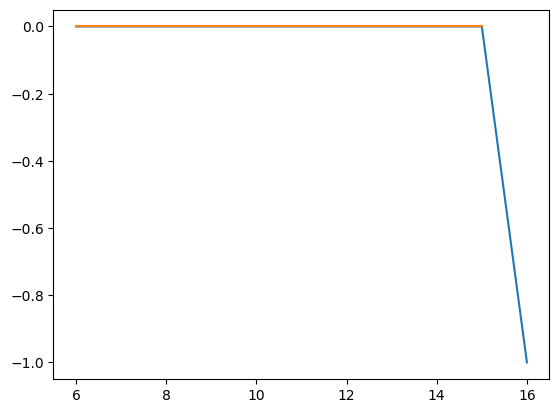

In [26]:
def calcArrayErrRel(real,obtained):
    return (obtained-real)/real


plt.plot(k,calcArrayErrRel(realX1,newX1))
plt.plot(k,calcArrayErrRel(realX2,x2(a,b,c)))

è meglio, ma non per l'ultimo elemento perchè è 0